In [156]:
from plotnine import *
import pandas as pd
import numpy as np

# Task 1

In [2]:
# Import dataset
q1 = pd.read_csv("/Users/lewk20/Desktop/MSBA/GSB_544/Data/q1data.csv")

In [6]:
q1.head()

,income,life_exp,population,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,1910.0,61.0,29200000.0,2010,Afghanistan,asia,south_asia,asia_west,South Asia
1,11100.0,78.1,2950000.0,2010,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,11100.0,74.7,36000000.0,2010,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,46900.0,81.9,84500.0,2010,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
4,7680.0,60.8,23400000.0,2010,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


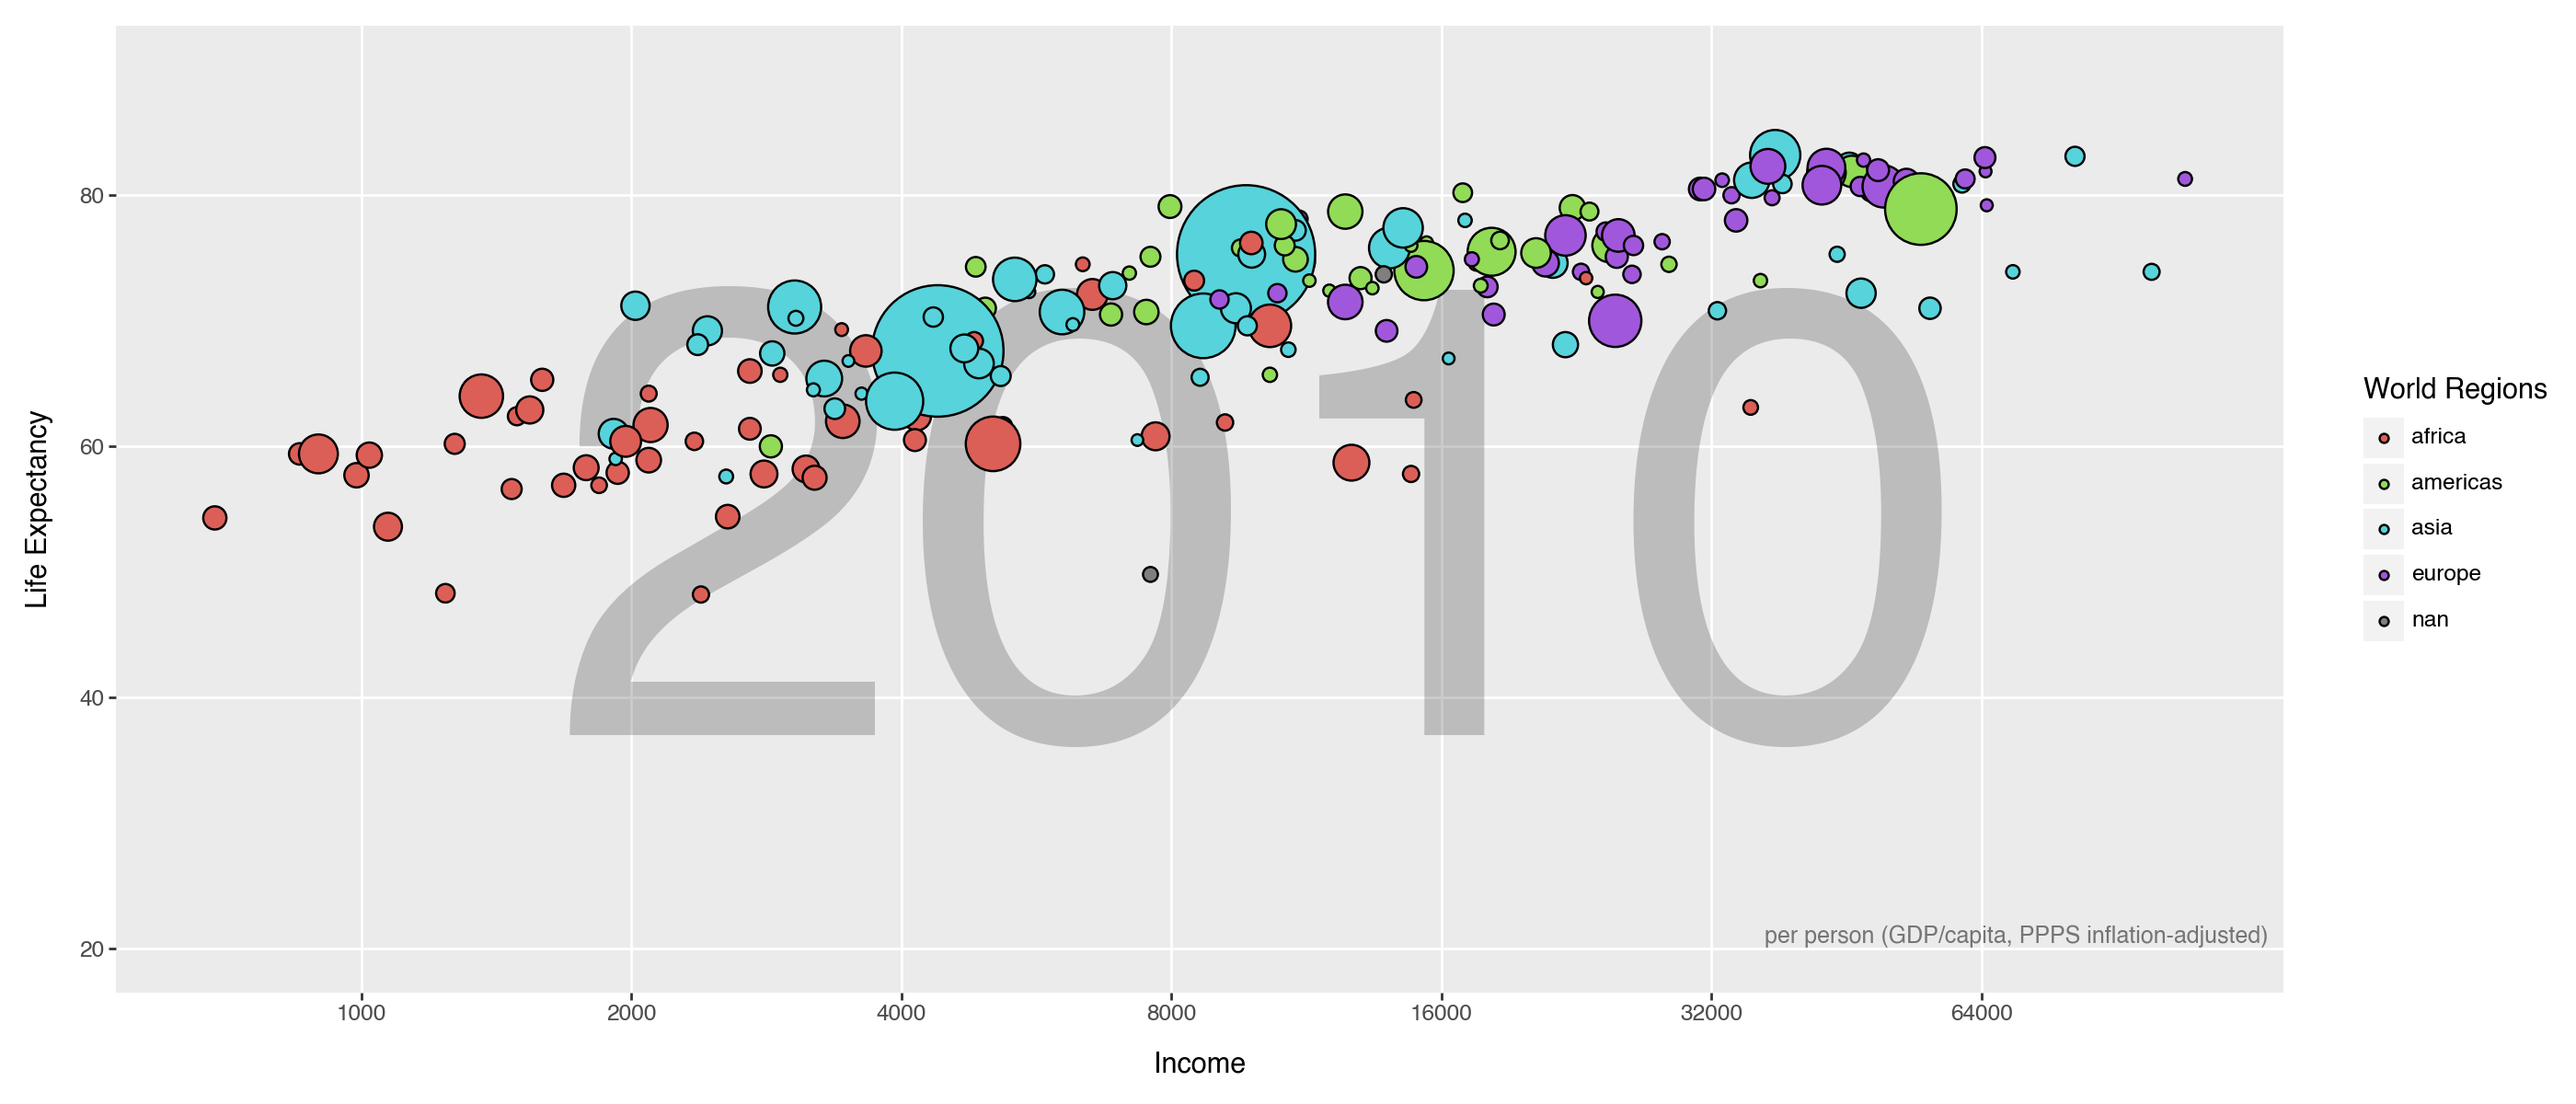

In [117]:
(
ggplot(q1, aes("income", "life_exp", size="population", fill="four_regions")) +
annotate(
    "text", x = 10000, y = 50, label = "2010", size = 250, color = "black", alpha=0.2
) +
annotate(
    "text", x = 70000, y = 21, label = "per person (GDP/capita, PPPS inflation-adjusted)", size = 9, color = "black", alpha=0.5
) +
geom_point(alpha=1) + 
scale_x_log10(breaks = [500, 1000, 2000, 4000, 8000, 16000, 32000, 64000]) +
scale_size(range=(2, 30))+
guides(size="none") +
ylim(20,90) + 
theme(
    figure_size=(14, 6),
    panel_grid_minor=element_blank()) +
labs(
    x = "Income", 
    y = "Life Expectancy", 
    fill = "World Regions")
)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin_2d : Removed 2 rows containing non-finite values.


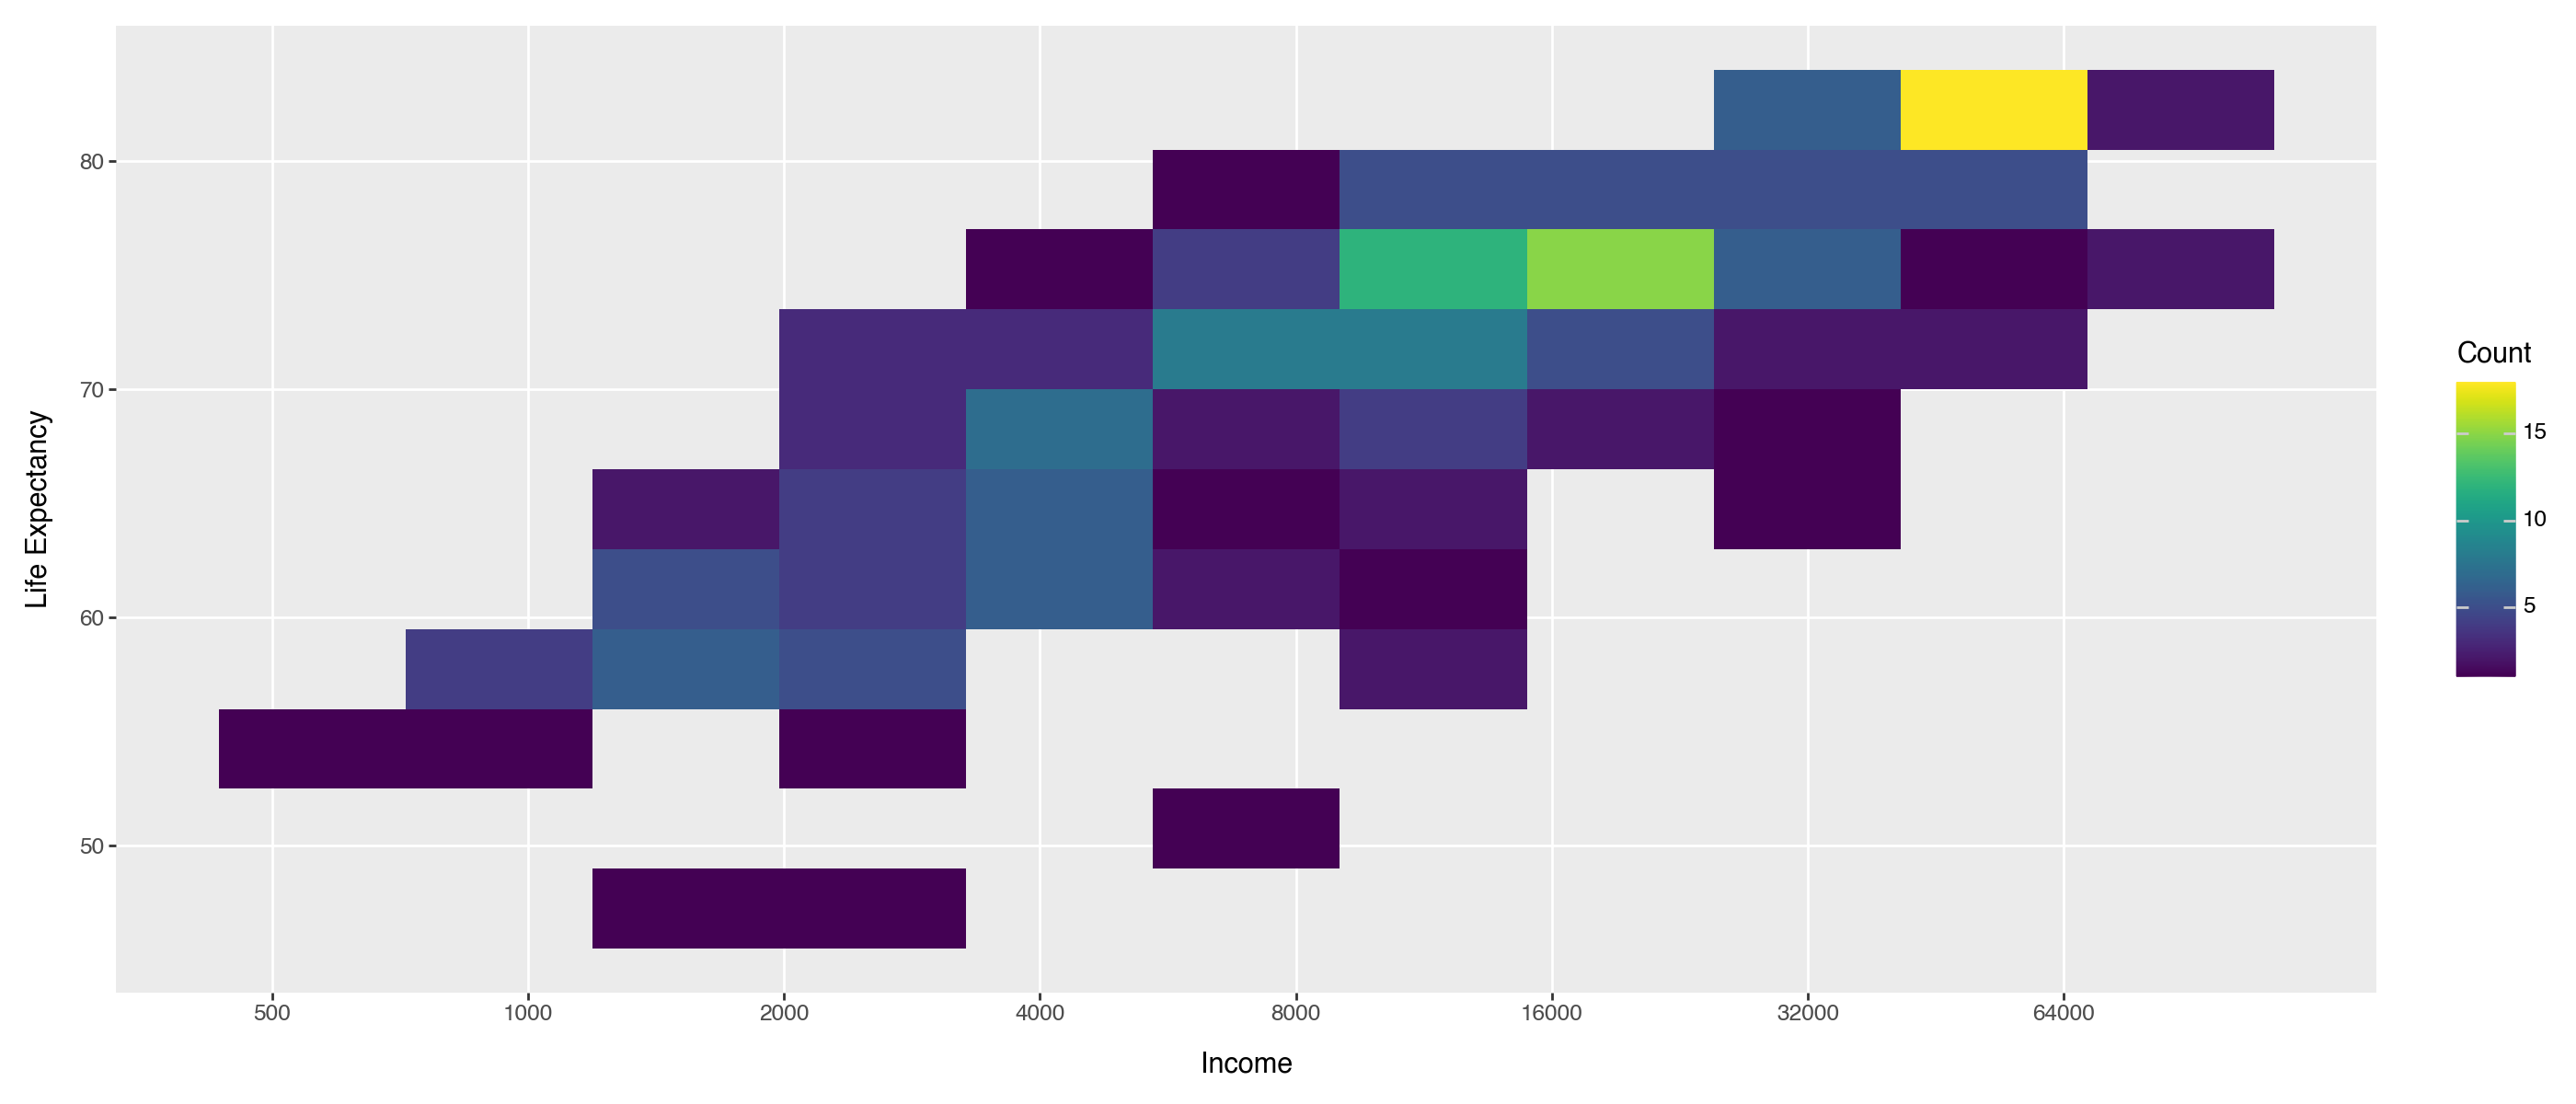

In [7]:
(
ggplot(q1, aes(x="income", y="life_exp", fill="..count..")) +  # Use count for fill
geom_bin_2d(bins=10) +  # Use geom_bin_2d for heatmap
scale_x_log10(breaks=[500, 1000, 2000, 4000, 8000, 16000, 32000, 64000]) +
labs(
    x="Income",              
    y="Life Expectancy",         
    fill="Count"
) +
theme(
    figure_size=(14, 6),
    panel_grid_minor=element_blank(),
)
)

For my second geom plot, I decided to make a heatmap using geom_bin_2d. This type of graph is good for conveying the positive correlation between income and life expectancy, but loses some information compared to the bubble plot. Specifically, this plot loses the indivdual country information that the bubble plot shows. Additionally, this plot loses all information on country population, whereas the bubble plot uses size to convey that information.  

# Task 2

In [60]:
# Import dataset
q2 = pd.read_csv("/Users/lewk20/Desktop/MSBA/GSB_544/Data/q2data.csv")

In [61]:
q2.head()
q2['energy'] = q2['energy'].str.replace('k', '').astype(float) * 1000  # Remove 'k' and convert to float
q2['energy'] = q2['energy'].astype(float)

q2['Percent Exports/Imports'] = q2['exports'] / q2['imports']
q2['country'] = q2['country'].astype(str)
q2['four_regions'] = pd.Categorical(q2['four_regions'], ordered=True)
q2 = q2.dropna()
q2 = q2.sort_values(by=['four_regions', 'Percent Exports/Imports'])
q2['country'] = pd.Categorical(q2['country'], categories=q2['country'].unique(), ordered=True)

In [62]:
q2.head()

,imports,exports,energy,year,country,four_regions,six_regions,eight_regions,world_bank_region,Percent Exports/Imports
57,80.1,14.80,307000.0,1997,Eritrea,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa,0.184769
124,27.8,9.94,396000.0,1997,Mozambique,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa,0.357554
177,15.2,6.70,487000.0,1997,Sudan,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa,0.440789
183,15.9,10.00,376000.0,1997,Tanzania,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa,0.628931
54,25.7,16.20,629000.0,1997,Egypt,africa,middle_east_north_africa,africa_north,Middle East & North Africa,0.630350


<positron-console-cell-55>:15: SyntaxWarning: invalid escape sequence '\%'
<positron-console-cell-55>:16: SyntaxWarning: invalid escape sequence '\%'


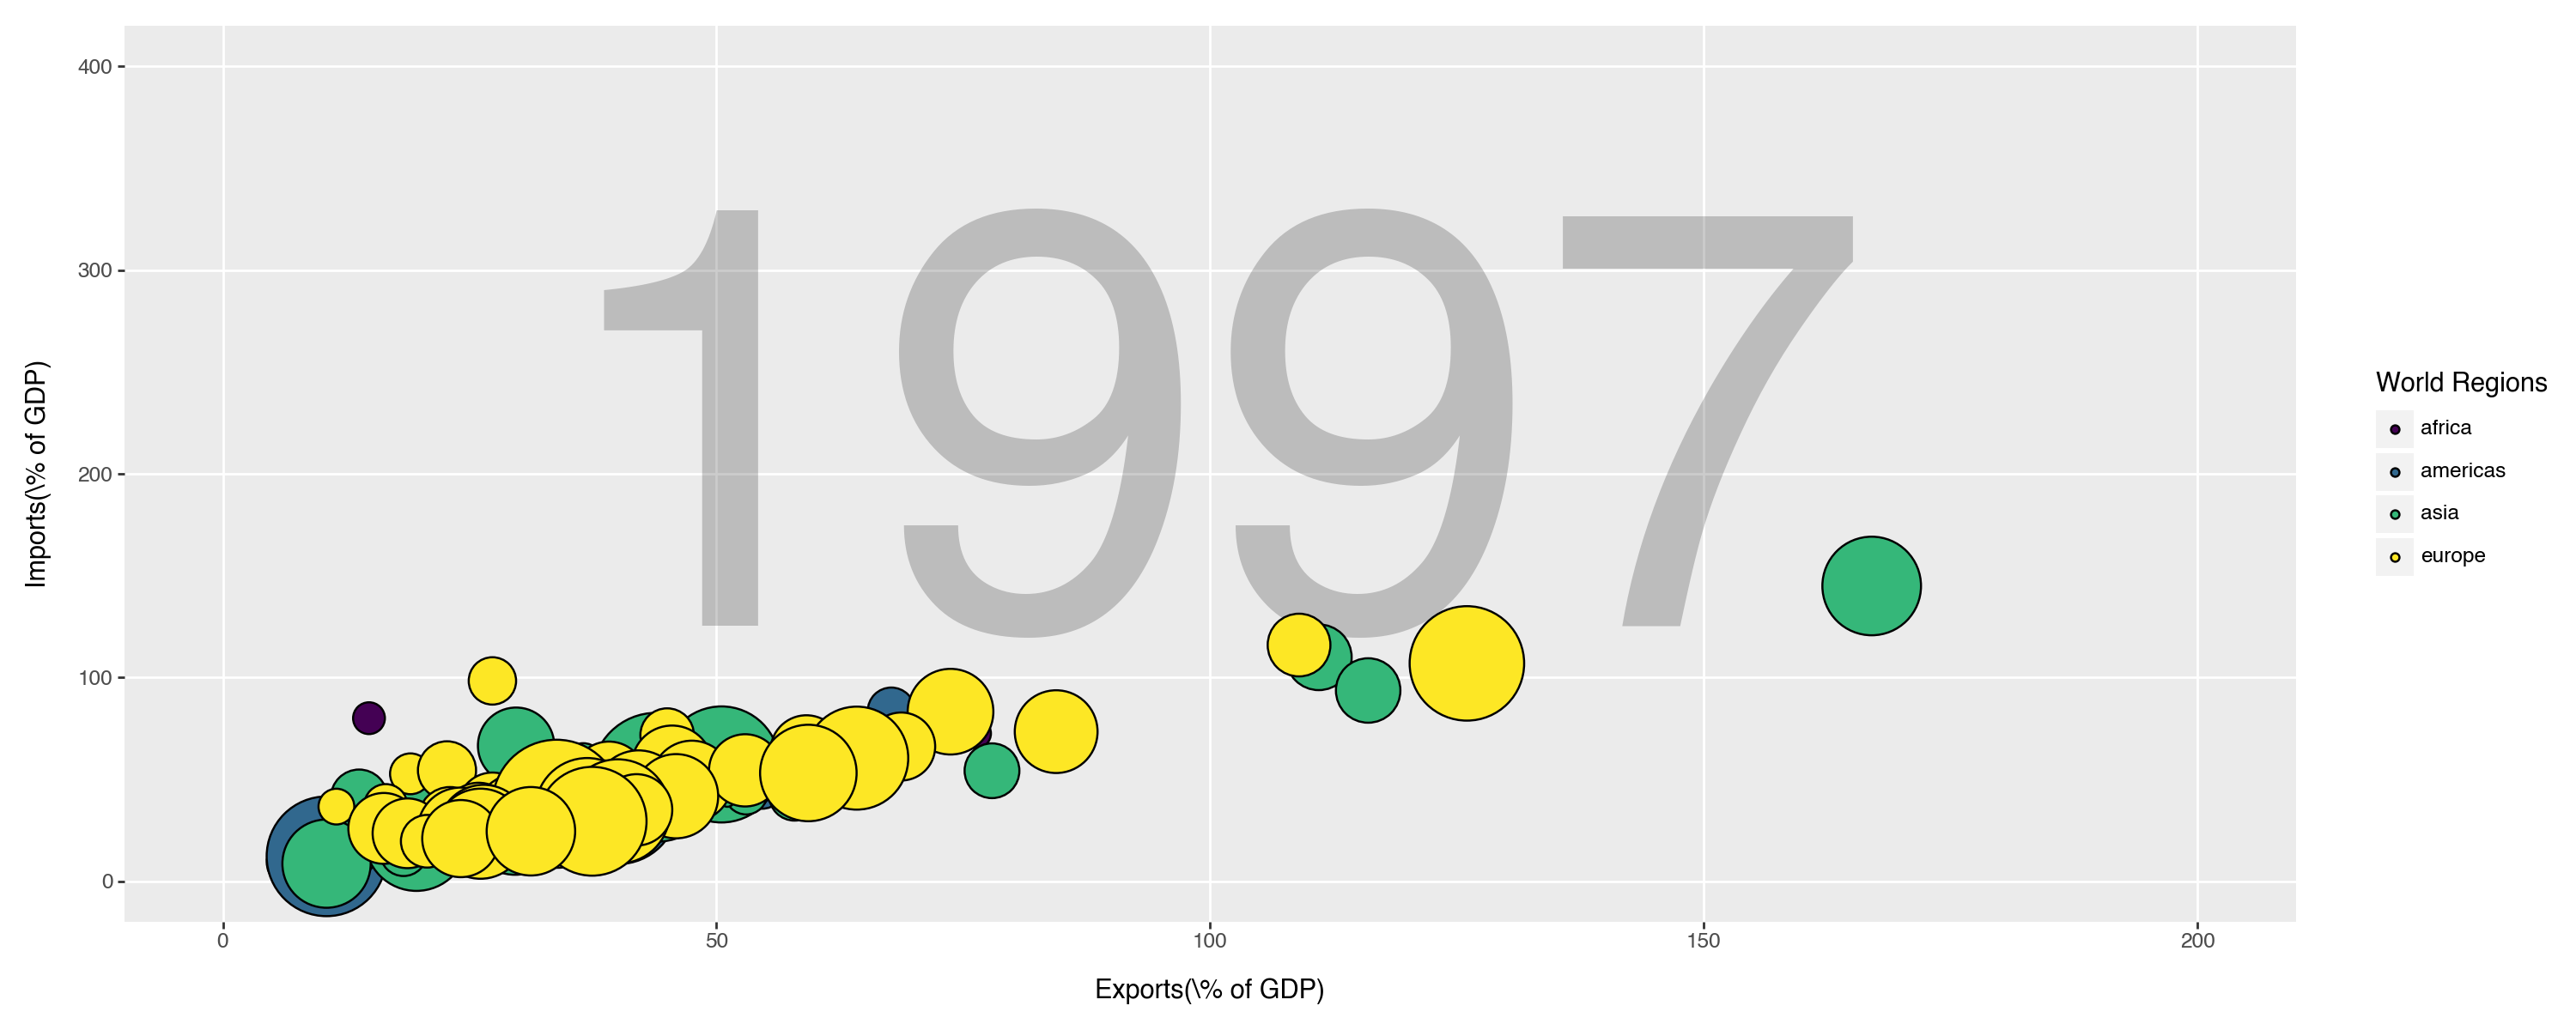

In [55]:
(
ggplot(q2, aes(x = "exports", y = "imports", size="energy", fill="factor(four_regions)")) +
annotate(
    "text", x = 100, y = 200, label = "1997", size = 250, color = "black", alpha=0.2
) +
geom_point(alpha=1) + 
scale_size(range=(2, 30))+
guides(size="none") +
ylim(0,400) + 
xlim(0, 200) + 
theme(
    figure_size=(15, 6),
    panel_grid_minor=element_blank()) +
labs(
    x = "Exports(\% of GDP)", 
    y = "Imports(\% of GDP)", 
    fill = "World Regions")
)

In [39]:
region_order = ['North America', 'Europe', 'Asia', 'South America']
q2['four_regions'] = pd.Categorical(q2['four_regions'], categories=region_order, ordered=True)


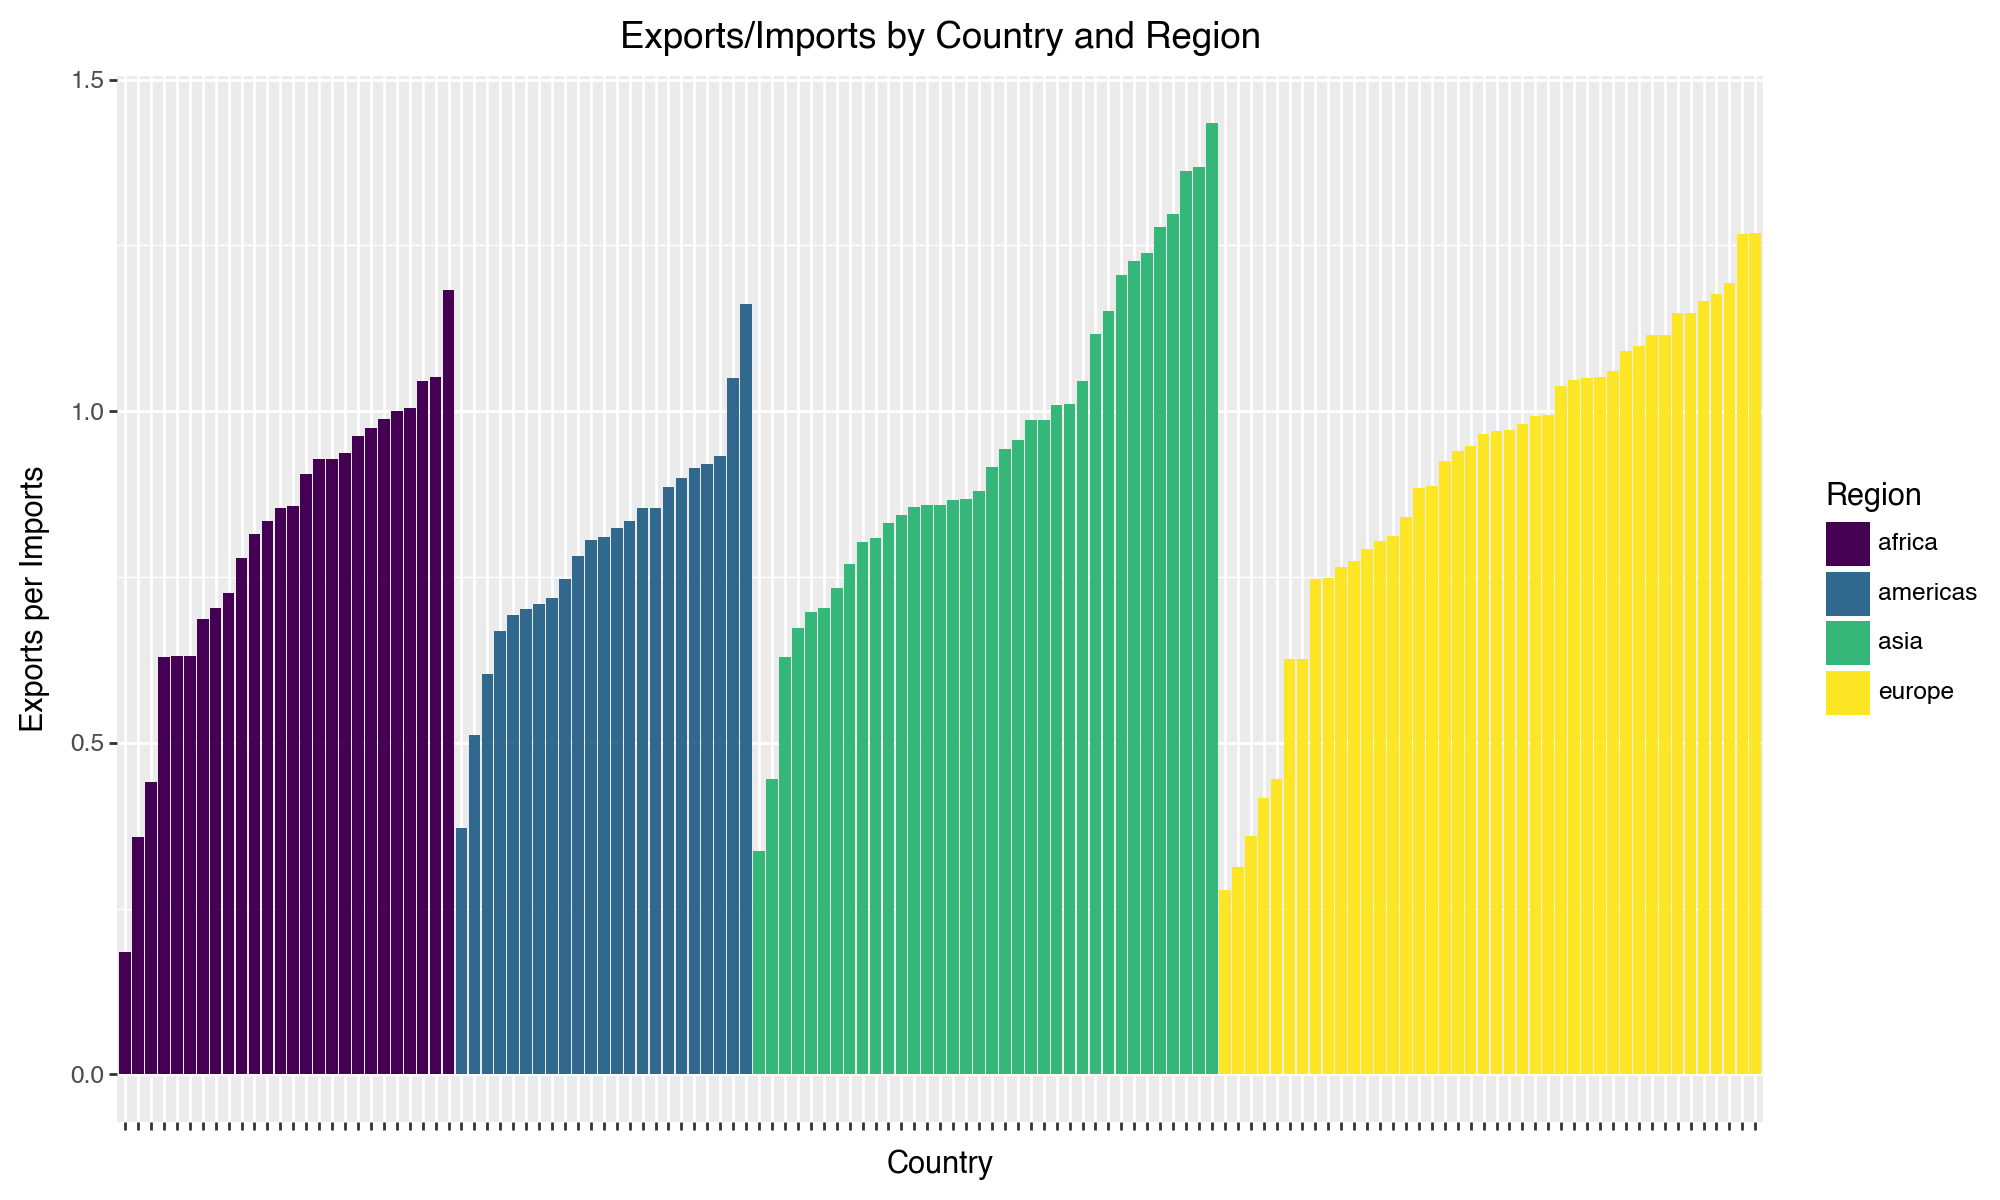

In [67]:
(
ggplot(q2, aes(x='country', y='Percent Exports/Imports', fill='four_regions')) +
geom_bar(stat='identity') +
theme(figure_size=(10, 6), axis_text_x=element_blank()) +
labs(x='Country', y='Exports per Imports', fill='Region', title='Exports/Imports by Country and Region')
)

For my alternative plot, I made a bar chart of exports/imports for each country. Additionally, I ordered the columns by the exports/imports value and by region, so you can see the value distributions within and between the 4 country regions. This plot is cool because it highlights the differences between regions in a way that the bubble plot did not. But on the other hand this plot lost some individual country information, like the "energy" variable, for which the bubble plot does a good job of showing

# Task 3

In [68]:
# Import dataset
q3 = pd.read_csv("/Users/lewk20/Desktop/MSBA/GSB_544/Data/q3data.csv")

In [69]:
q3.head()

,internet_users,gdp,income,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,0.00456,330.0,1190.0,2001,Afghanistan,asia,south_asia,asia_west,South Asia
1,0.39000,2570.0,6780.0,2001,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,1.59000,3770.0,9230.0,2001,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,NaN,10500.0,NaN,2001,American Samoa,NaN,NaN,NaN,NaN
4,11.30000,42600.0,35600.0,2001,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia


<positron-console-cell-118>:7: SyntaxWarning: invalid escape sequence '\%'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 32 rows containing missing values.


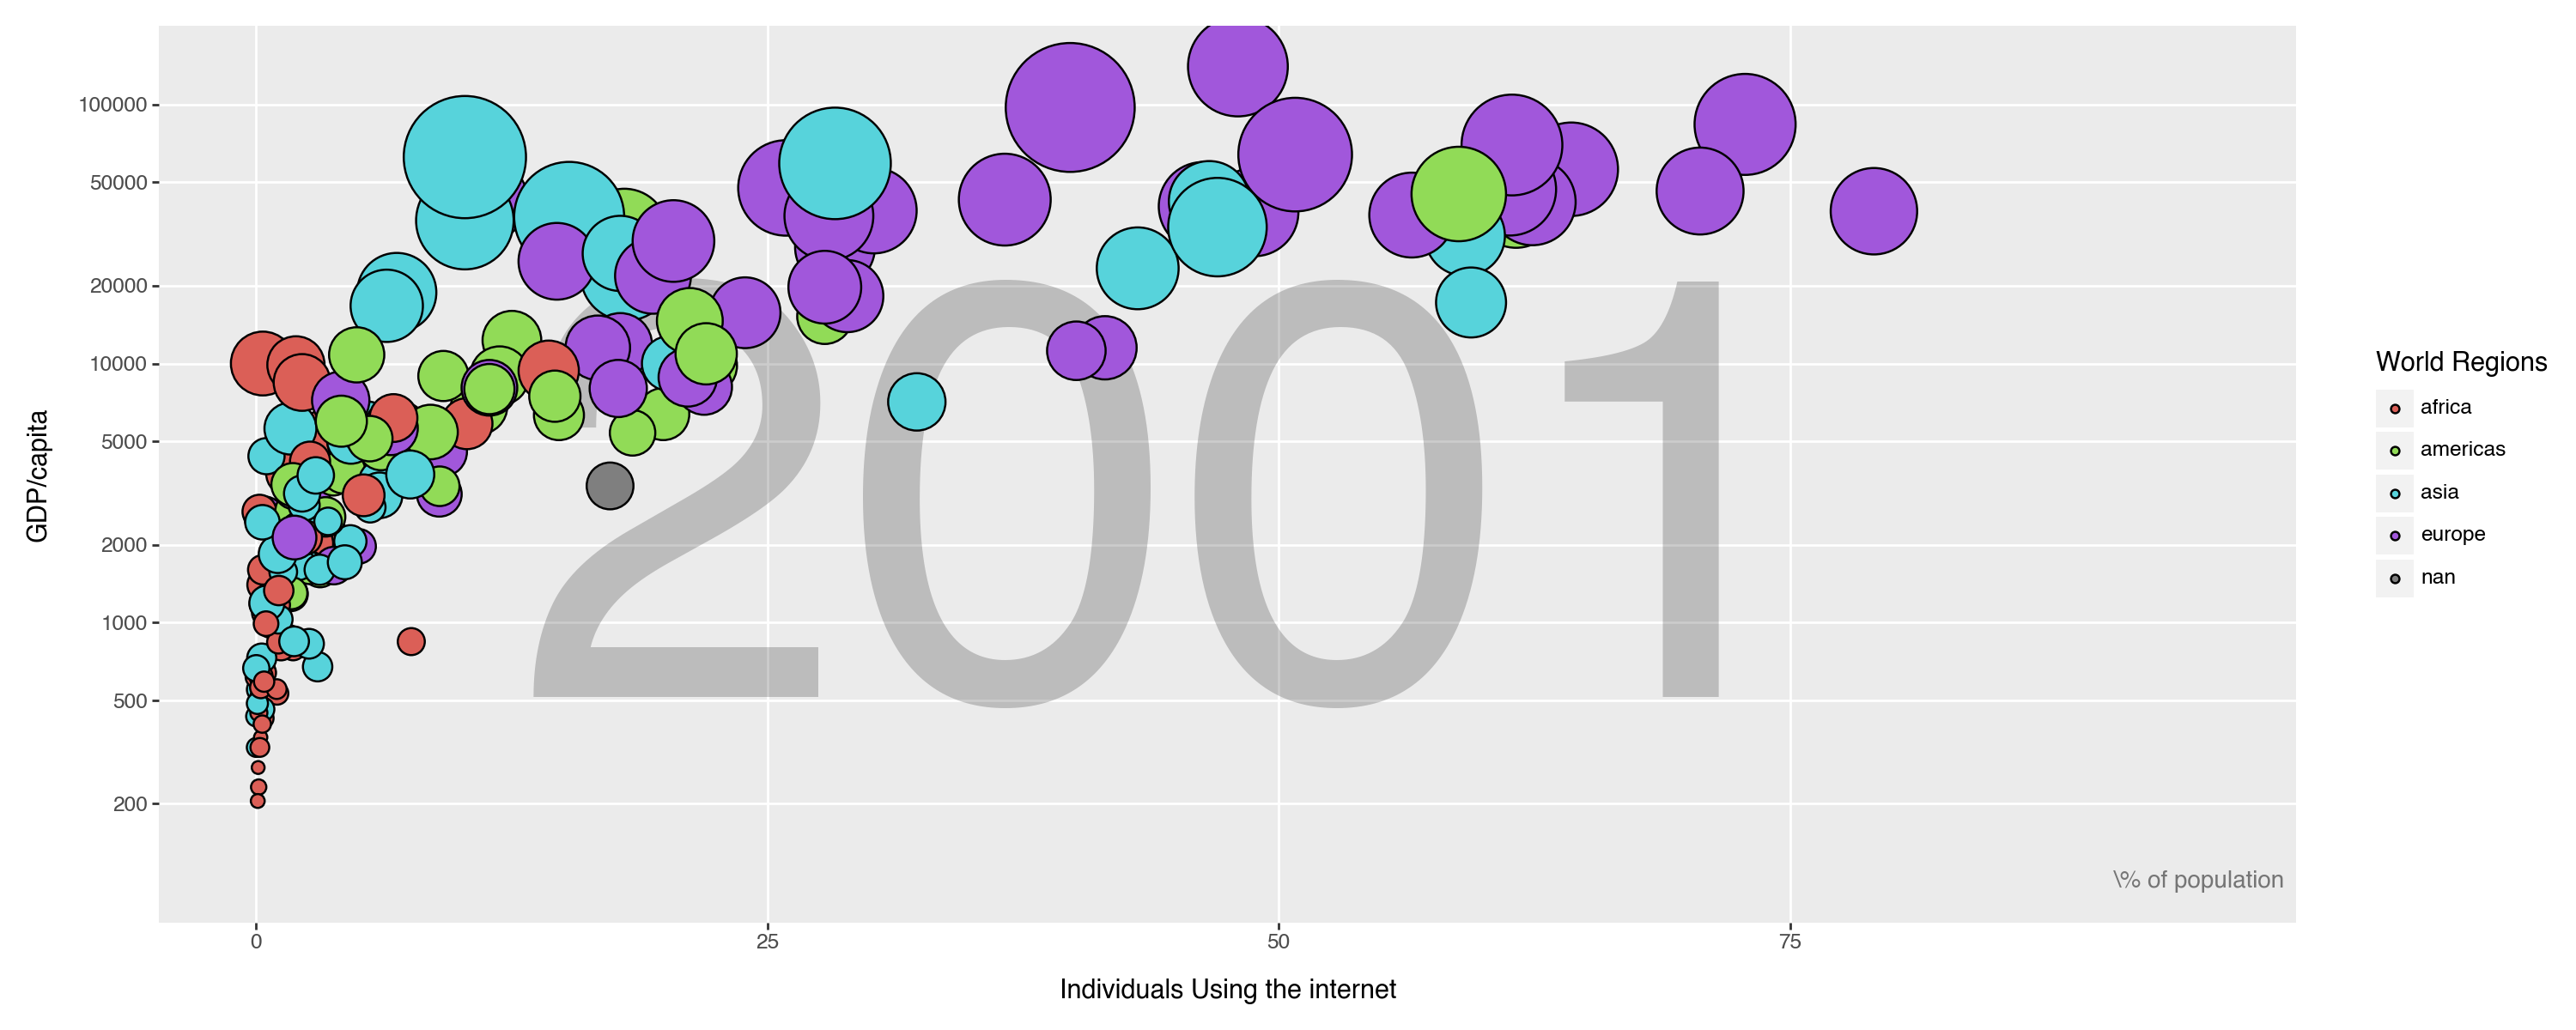

In [118]:
(
ggplot(q3, aes(x = "internet_users", y = "gdp", size="income", fill="factor(four_regions)")) +
annotate(
    "text", x = 45, y = 2000, label = "2001", size = 250, color = "black", alpha=0.2
) +
annotate(
    "text", x = 95, y = 100, label = "\% of population", size = 10, color = "black", alpha=0.5
) +
geom_point(alpha=1) + 
scale_size(range=(2, 30))+
guides(size="none") +
scale_y_log10(breaks = [200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]) +
xlim(0, 95) + 
theme(
    figure_size=(15, 6),
    panel_grid_minor=element_blank()) +
labs(
    x = "Individuals Using the internet", 
    y = "GDP/capita", 
    fill = "World Regions")
)

In [128]:
q3.dtypes

internet_users       float64
gdp                  float64
income               float64
year                   int64
country               object
four_regions          object
six_regions           object
eight_regions         object
world_bank_region     object
dtype: object

In [130]:
q3_cleaned = q3.dropna(subset=['internet_users', 'gdp'])

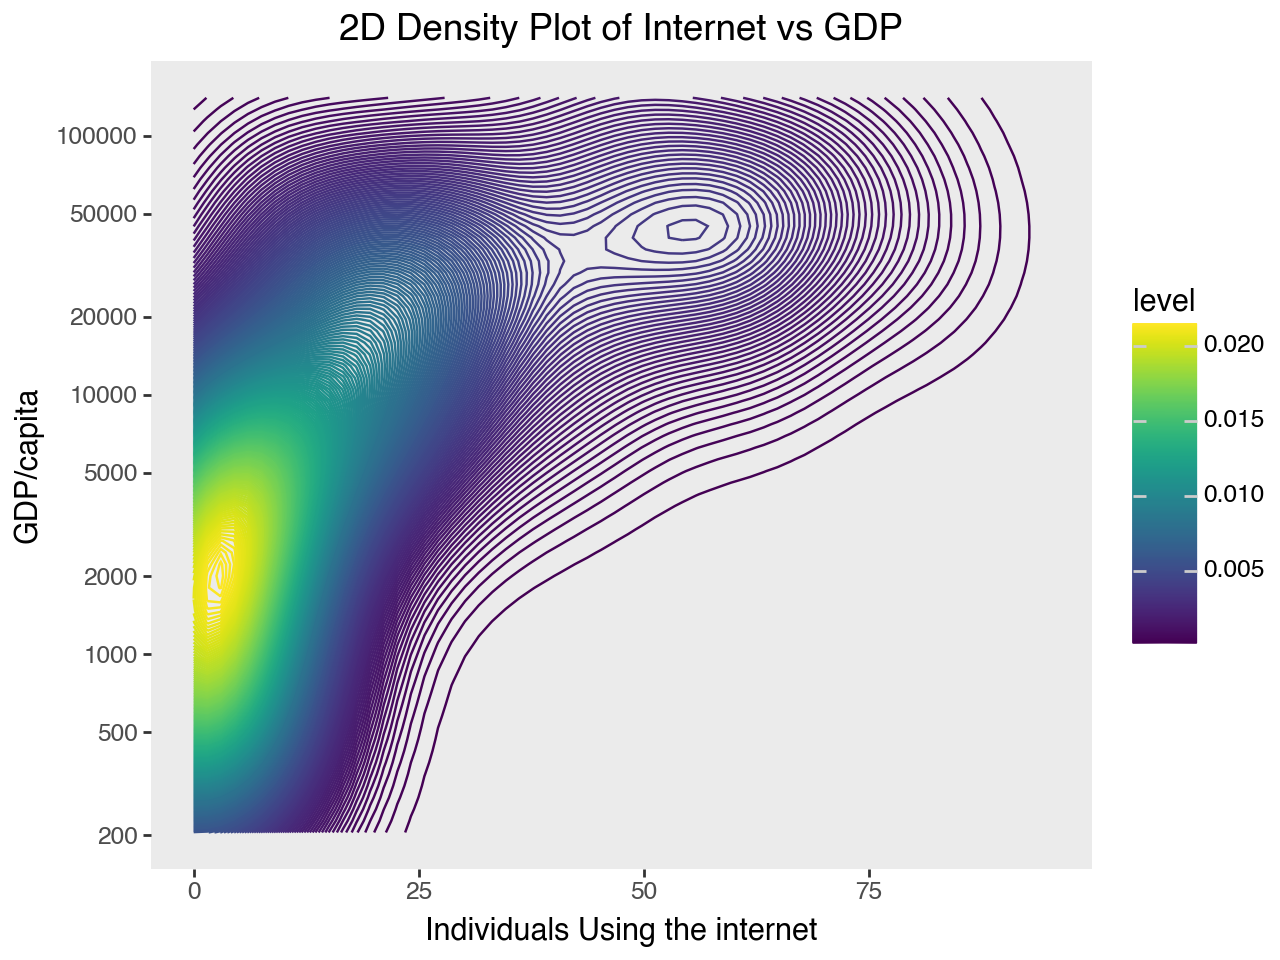

In [176]:
levels = np.linspace(0, 0.1, 1000)

(ggplot(q3_cleaned, aes(x='internet_users', y='gdp')) +
geom_density_2d(aes(color='..level..'), contour=True, levels=levels) +
scale_y_log10(breaks = [200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]) +
xlim(0, 95) +
theme(
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank()
    ) +
labs(title='2D Density Plot of Internet vs GDP',
        x='Individuals Using the internet',
        y='GDP/capita')
)

For my alternative plot, I created a 2d density plot using goem_density_2d. This type of graph does a good job of communicating the general relationship between these 2 variables and the density of where countries lie in this space. But like the other alternatives I created, this one isn't able to keep the individual country information in the same way the bubble plot is able too. In addition, this plot loses an entire variable, "Income", when compared to the bubble plot, which uses the size to add this additional variable. 